In [1]:
import numpy as np
import pandas as pd
wine = pd.read_csv('/Users/wlee/Desktop/Georgia Tech/Spring 2018/CS 4400 Intro to Databases/Project/wine-reviews/winemag-data-130k-v2.csv')
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [2]:
wine = wine[['country', 'description', 'title', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'variety', 'winery']]
wine.head()

,country,description,title,designation,points,price,province,region_1,region_2,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Nicosia 2013 Vulkà Bianco (Etna),Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Quinta dos Avidagos 2011 Avidagos Red (Douro),Avidagos,87,15.0,Douro,NaN,NaN,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",Rainstorm 2013 Pinot Gris (Willamette Valley),NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",St. Julian 2013 Reserve Late Harvest Riesling ...,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Sweet Cheeks


In [4]:
df_rg = wine.copy()
df_rg['country'] = wine.country.astype('category')
df_rg['variety'] = wine.variety.astype('category')
df_rg['winery'] = wine.winery.astype('category')
df_rg.head()

,country,description,title,designation,points,price,province,region_1,region_2,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Nicosia 2013 Vulkà Bianco (Etna),Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Quinta dos Avidagos 2011 Avidagos Red (Douro),Avidagos,87,15.0,Douro,NaN,NaN,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",Rainstorm 2013 Pinot Gris (Willamette Valley),NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",St. Julian 2013 Reserve Late Harvest Riesling ...,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Sweet Cheeks


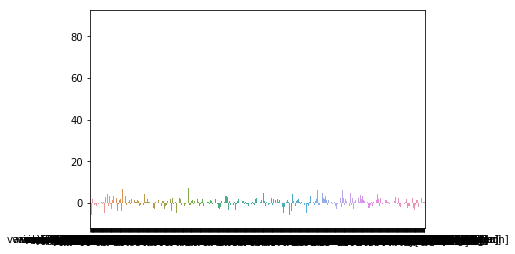

In [12]:
df_rg.dropna(how="any")

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

predictor = 'variety'

model = smf.ols('points ~ {}'.format(predictor), data = df_rg).fit()

sns.barplot(x = model.params.index, y = model.params)

In [ ]:
def regression(df, country, year, predictor):

    df_c = df[df['country'] == country]
    df_cy = df_c[(df_c.year >= year[0]) & (df_c.year <= year[1])]
    X = df_cy[predictor]
    y = df_cy['casualty']
    Xy = pd.concat([X,y], axis = 1).dropna(how = 'any')

    # Note the difference in argument order
    model = smf.ols('casualty ~ {}'.format(predictor), data = Xy).fit()

    # Print out the statistics
    print ('The regression coefficients for the intercept and the selected predictor are \n {} \n and the p-values are \n {}.'.format(model.params, model.pvalues))
    
    # Create barplot
    #return sns.barplot(x = model.params.index, y = model.params)
    
regression(df_rg, 'United States', [2005, 2010], 'attack_type')